In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Shoe-Sales.csv")

In [3]:
df.head()

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91


In [4]:
df.dtypes

YearMonth     object
Shoe_Sales     int64
dtype: object

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
df= pd.read_csv('Shoe-Sales.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [7]:
df.head()

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


In [8]:
#We can conveniently do slicing i.e. obtain data for a specific time period.
df['1980-01-01':'1981-01-01']

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91
1980-06-01,95
1980-07-01,96
1980-08-01,128
1980-09-01,124


In [9]:
df.loc['1980-02-01']

Shoe_Sales    89
Name: 1980-02-01 00:00:00, dtype: int64

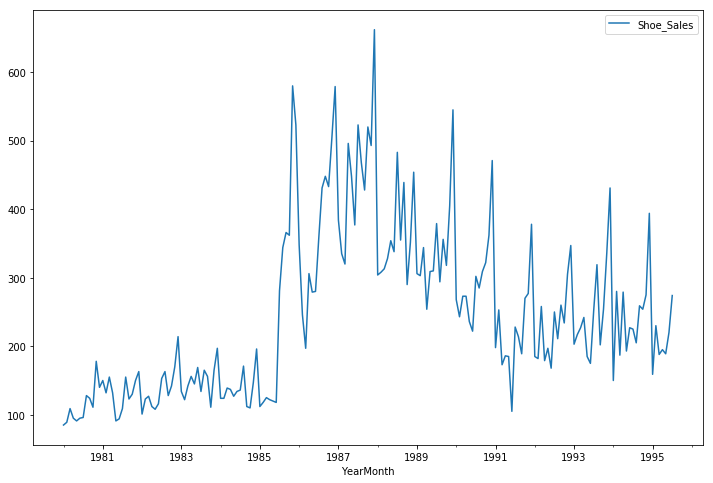

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.show()

###### We see there is no trend and seasonality in nature.

In [11]:
df.isnull().sum()

Shoe_Sales    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BD58BCD30>]],
      dtype=object)

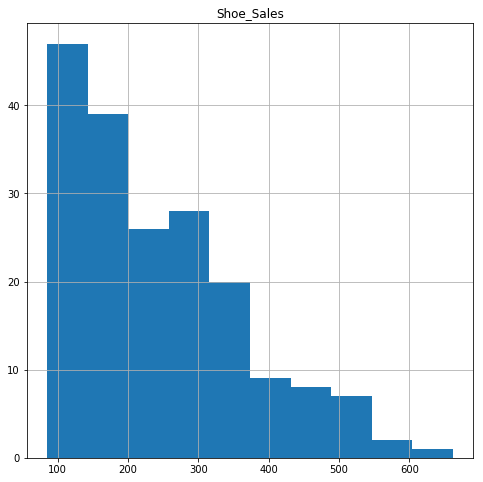

In [12]:
df.hist(figsize=(8,8))

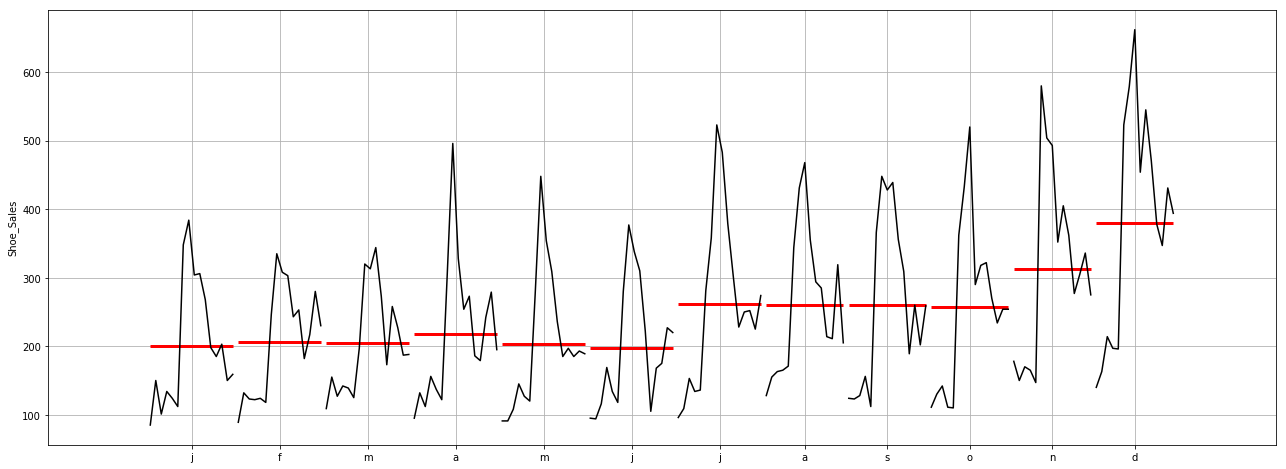

In [13]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Shoe_Sales',ax=ax)
plt.grid();

## Decomposition of data

### Additive Model

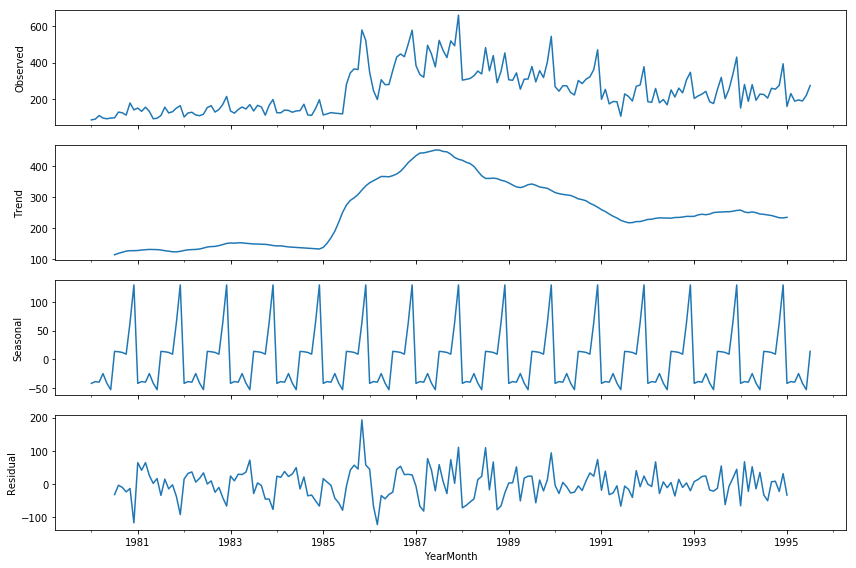

In [14]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

### Multiplicative Model

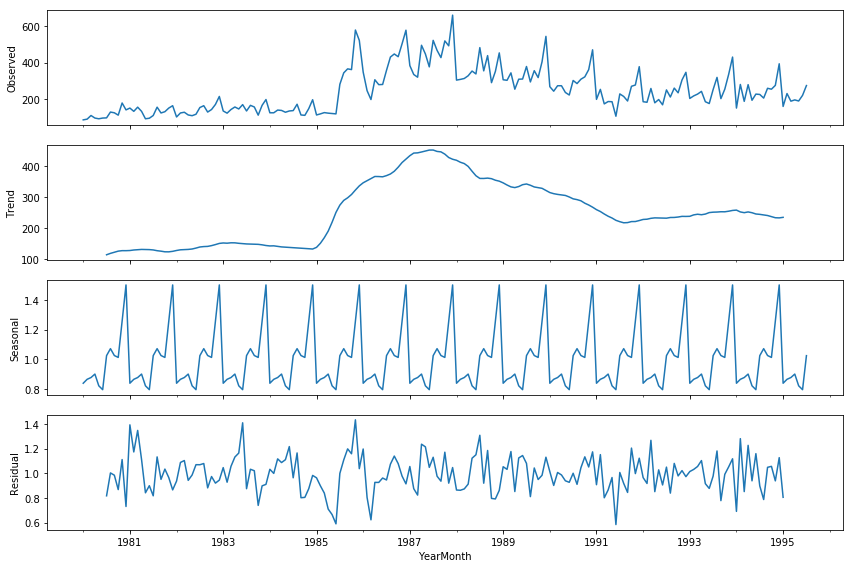

In [15]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

#### Split the data into train and test and plot the training and test data. [30% of the most recent data should be in the test set]

In [16]:
train    =   df[0:int(len(df)*0.71)] 
test     =   df[int(len(df)*0.71):]

In [17]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [18]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


Last few rows of Training Data


,Shoe_Sales
YearMonth,
1990-08-01,285
1990-09-01,309
1990-10-01,322
1990-11-01,362
1990-12-01,471


First few rows of Test Data


,Shoe_Sales
YearMonth,
1991-01-01,198
1991-02-01,253
1991-03-01,173
1991-04-01,186
1991-05-01,185


Last few rows of Test Data


,Shoe_Sales
YearMonth,
1995-03-01,188
1995-04-01,195
1995-05-01,189
1995-06-01,220
1995-07-01,274


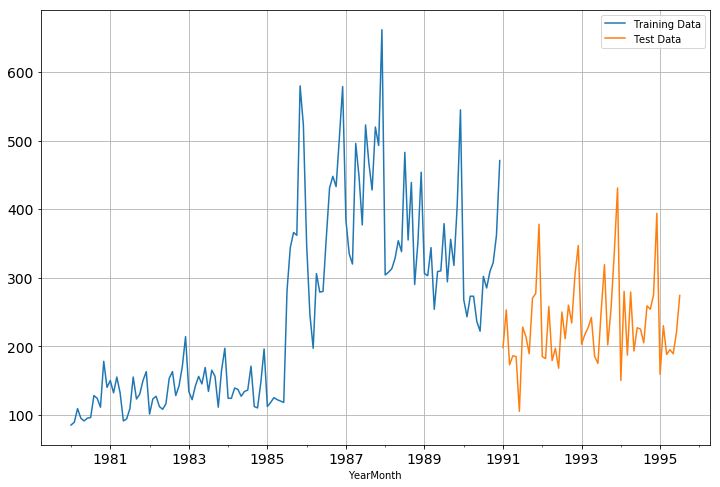

In [19]:
train['Shoe_Sales'].plot(fontsize=14)
test['Shoe_Sales'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Building different models and comparing the accuracy metrics.

### Model 1: Linear Regression

In [20]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]


In [21]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [22]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Shoe_Sales,time
YearMonth,,
1980-01-01,85,1
1980-02-01,89,2
1980-03-01,109,3
1980-04-01,95,4
1980-05-01,91,5


Last few rows of Training Data


,Shoe_Sales,time
YearMonth,,
1990-08-01,285,128
1990-09-01,309,129
1990-10-01,322,130
1990-11-01,362,131
1990-12-01,471,132


First few rows of Test Data


,Shoe_Sales,time
YearMonth,,
1991-01-01,198,256
1991-02-01,253,257
1991-03-01,173,258
1991-04-01,186,259
1991-05-01,185,260


Last few rows of Test Data


,Shoe_Sales,time
YearMonth,,
1995-03-01,188,306
1995-04-01,195,307
1995-05-01,189,308
1995-06-01,220,309
1995-07-01,274,310


In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

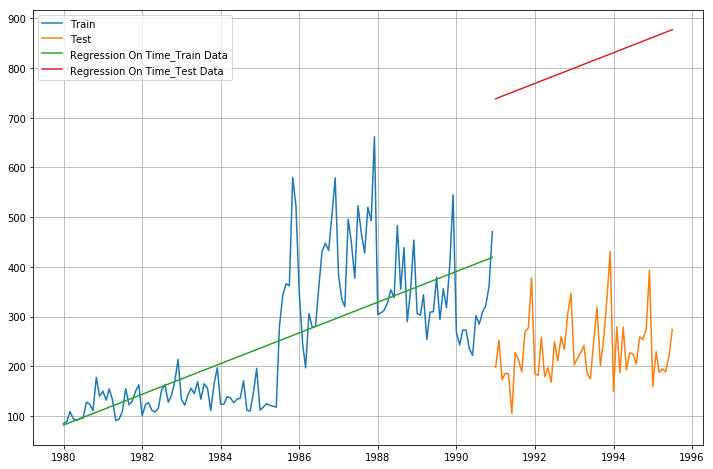

In [24]:
train_predictions_model1= lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [25]:
from sklearn import metrics

In [26]:
rmse_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 333901.177 


In [27]:
rmse_model1_train = metrics.mean_squared_error(train['Shoe_Sales'],train_predictions_model1)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f " %(rmse_model1_train))

For RegressionOnTime forecast on the Train Data,  RMSE is 9482.956 


In [28]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,333901.176928


In [29]:
resultsDf = pd.DataFrame({'Train RMSE': [rmse_model1_train]},index=['RegressionOnTime'])
resultsDf

,Train RMSE
RegressionOnTime,9482.956289


### Model 2: Naive Approach: y^t+1=yt

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [30]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [31]:
train.tail()

,Shoe_Sales
YearMonth,
1990-08-01,285
1990-09-01,309
1990-10-01,322
1990-11-01,362
1990-12-01,471


In [32]:
NaiveModel_test['naive'] = np.asarray(train['Shoe_Sales'])[len(np.asarray(train['Shoe_Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    471
1991-02-01    471
1991-03-01    471
1991-04-01    471
1991-05-01    471
Name: naive, dtype: int64

In [33]:
NaiveModel_train['naive'] = np.asarray(test['Shoe_Sales'])[len(np.asarray(test['Shoe_Sales']))-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    274
1980-02-01    274
1980-03-01    274
1980-04-01    274
1980-05-01    274
Name: naive, dtype: int64

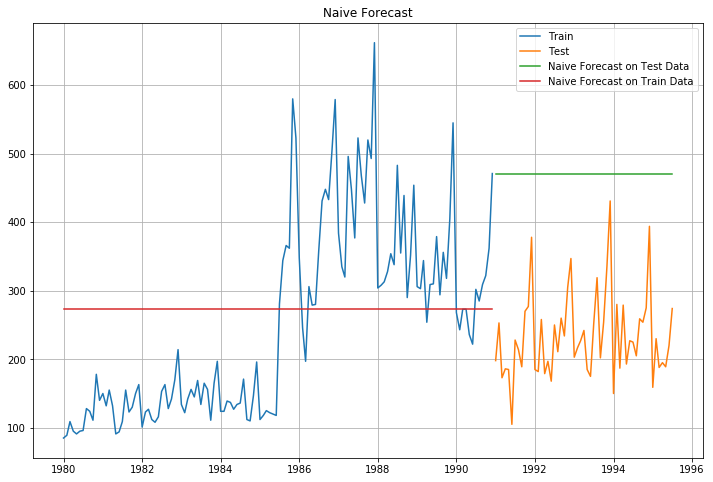

In [34]:
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Train Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [35]:
rmse_model2_test = metrics.mean_squared_error(test['Shoe_Sales'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 60084.455


In [36]:
rmse_model2_train = metrics.mean_squared_error(train['Shoe_Sales'],NaiveModel_train['naive'])
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model2_train))

For RegressionOnTime forecast on the Train Data,  RMSE is 19641.394


In [37]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Test RMSE,Train RMSE
RegressionOnTime,NaN,9482.956289
NaiveModel,60084.454545,NaN


### Model3: Simple Average

In [38]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [39]:
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_test.head()

,Shoe_Sales,mean_forecast
YearMonth,,
1991-01-01,198,250.575758
1991-02-01,253,250.575758
1991-03-01,173,250.575758
1991-04-01,186,250.575758
1991-05-01,185,250.575758


In [40]:
SimpleAverage_train.head()

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


In [41]:
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_test.head()

,Shoe_Sales,mean_forecast
YearMonth,,
1991-01-01,198,250.575758
1991-02-01,253,250.575758
1991-03-01,173,250.575758
1991-04-01,186,250.575758
1991-05-01,185,250.575758


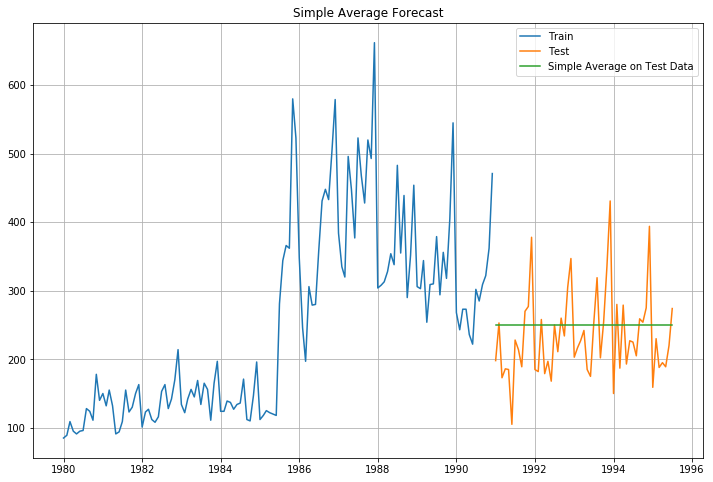

In [42]:
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [43]:
rmse_model3_test = metrics.mean_squared_error(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 4094.025


In [44]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Test RMSE,Train RMSE
RegressionOnTime,NaN,9482.956289
NaiveModel,60084.454545,NaN
SimpleAverageModel,4094.025161,NaN


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

#### For Moving Average, we are going to average over the entire data.

In [45]:
MovingAverage = df.copy()
MovingAverage.head()

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


In [46]:
MovingAverage['Trailing_2'] = MovingAverage['Shoe_Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Shoe_Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Shoe_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Shoe_Sales'].rolling(9).mean()

MovingAverage.head()

,Shoe_Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,85,NaN,NaN,NaN,NaN
1980-02-01,89,87.0,NaN,NaN,NaN
1980-03-01,109,99.0,NaN,NaN,NaN
1980-04-01,95,102.0,94.5,NaN,NaN
1980-05-01,91,93.0,96.0,NaN,NaN


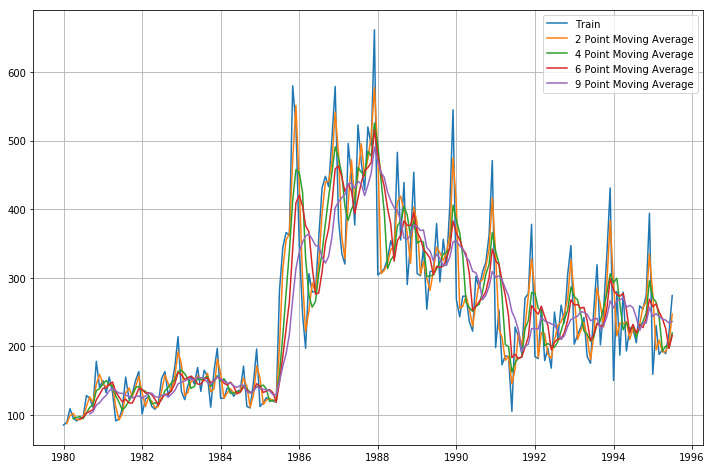

In [47]:
plt.plot(MovingAverage['Shoe_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

##### Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [48]:
# Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

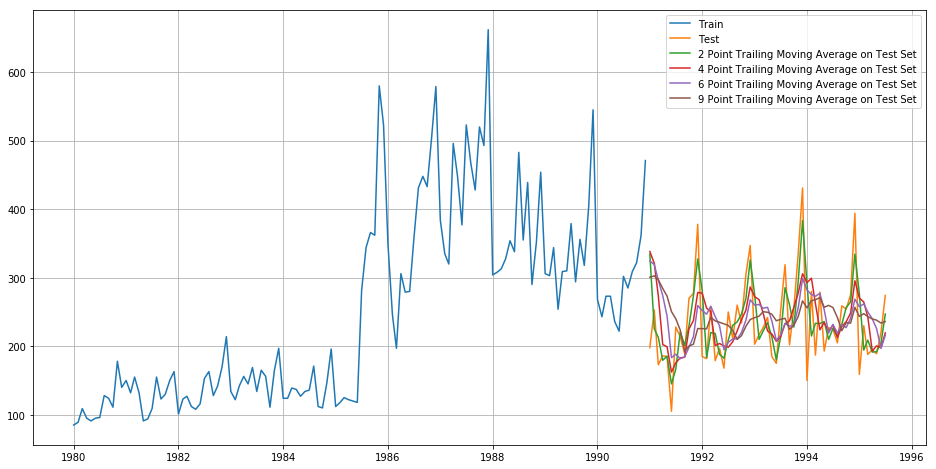

In [49]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Shoe_Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Shoe_Sales'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [50]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 2111.286
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 3349.248
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 4026.777
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 4586.492


In [51]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Test RMSE,Train RMSE
RegressionOnTime,NaN,9482.956289
NaiveModel,60084.454545,NaN
SimpleAverageModel,4094.025161,NaN
2pointTrailingMovingAverage,2111.286364,NaN
4pointTrailingMovingAverage,3349.247727,NaN
6pointTrailingMovingAverage,4026.777273,NaN
9pointTrailingMovingAverage,4586.492480,NaN


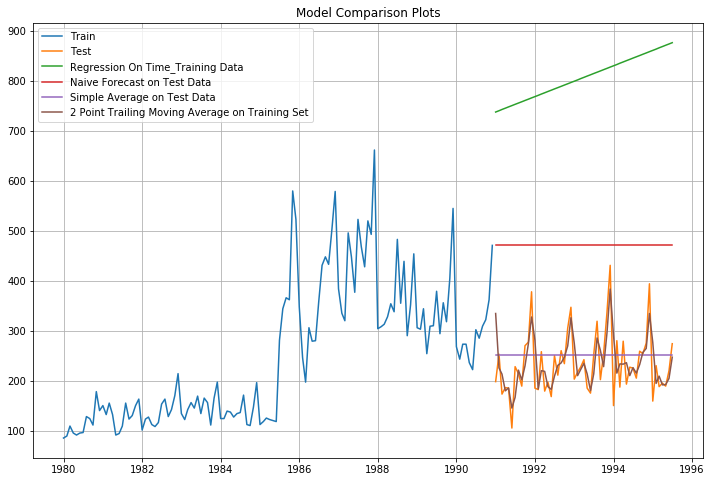

In [52]:
## Plotting on both Training and Test data

plt.plot(train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [53]:
import matplotlib
import sklearn
import statsmodels

In [54]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.15.4
Pandas version: 0.23.4
Seaborn version: 0.9.0
Matplotlib version: 3.0.2
Sklearn version: 0.21.3
Statsmodels version: 0.9.0


In [55]:
Time_Stamp = pd.date_range(start='1980-01-01',periods=len(df),freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [56]:
df['Time_Stamp'] = Time_Stamp
df.head()

,Shoe_Sales,Time_Stamp
YearMonth,,
1980-01-01,85,1980-01-31
1980-02-01,89,1980-02-29
1980-03-01,109,1980-03-31
1980-04-01,95,1980-04-30
1980-05-01,91,1980-05-31


In [57]:
df.set_index(keys='Time_Stamp',inplace=True)
df

,Shoe_Sales
Time_Stamp,
1980-01-31,85
1980-02-29,89
1980-03-31,109
1980-04-30,95
1980-05-31,91
1980-06-30,95
1980-07-31,96
1980-08-31,128
1980-09-30,124


##### Plot the Time Series to understand the behaviour of the data.

In [58]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

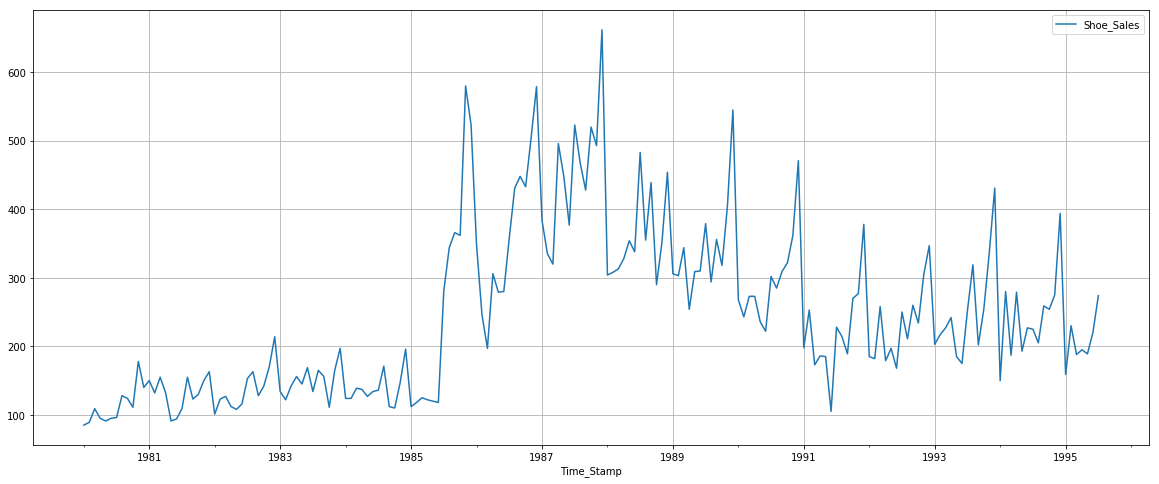

In [59]:
df.plot(grid=True);

##### We can see that there is a trend with a seasonal pattern associated as well.

In [60]:
df.describe()

,Shoe_Sales
count,187.000000
mean,245.636364
std,121.390804
min,85.000000
25%,143.500000
50%,220.000000
75%,315.500000
max,662.000000


#### The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

### Decompose the Time Series and plot the different components.

In [61]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

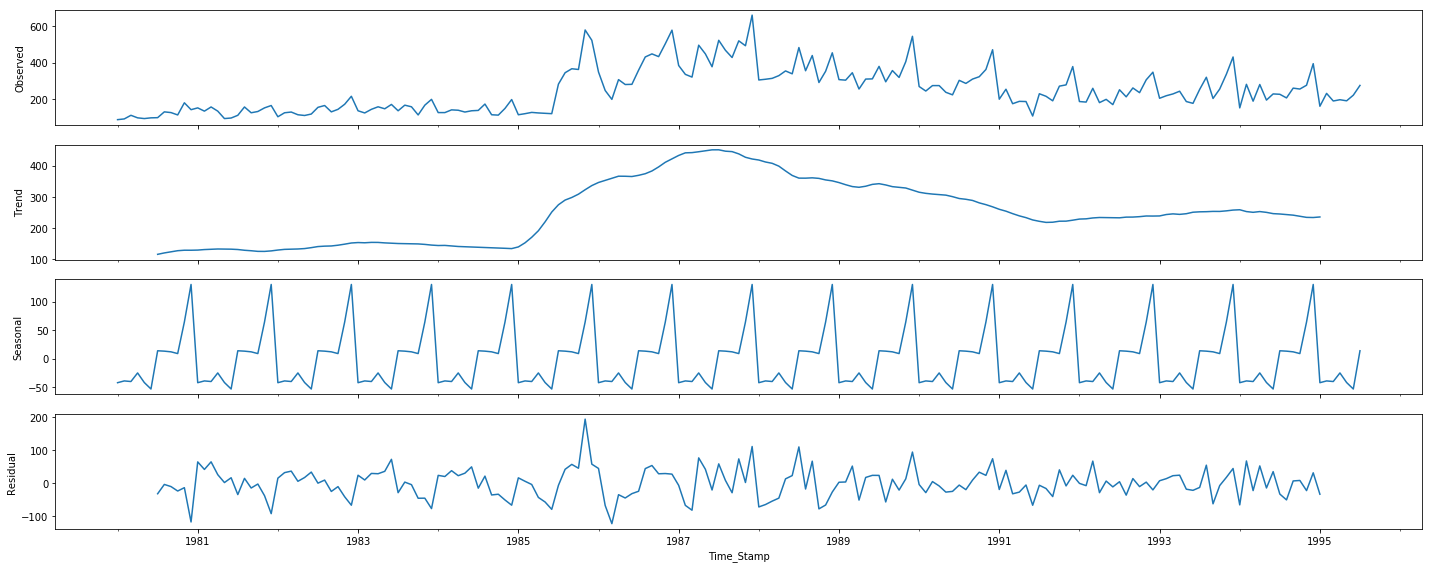

In [62]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

##### We see that the residuals have a pattern in this decomposition.

In [63]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
             Shoe_Sales
Time_Stamp            
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31  114.458333
1980-08-31  118.958333
1980-09-30  122.666667
1980-10-31  126.125000
1980-11-30  127.666667
1980-12-31  127.625000 

Seasonality 
             Shoe_Sales
Time_Stamp            
1980-01-31  -42.175463
1980-02-29  -39.062566
1980-03-31  -40.122090
1980-04-30  -25.092328
1980-05-31  -41.878042
1980-06-30  -53.208399
1980-07-31   13.741204
1980-08-31   13.077315
1980-09-30   11.866204
1980-10-31    8.835648
1980-11-30   64.152315
1980-12-31  129.866204 

Residual 
             Shoe_Sales
Time_Stamp            
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31  -32.199537
1980-08-31   -4.035648
1980-09-30  -10.532870
1980-10-31  -23.960648
1980-11-30  -13.818981
1980-12-31 -117.4912

### Multiplicative Decomposition

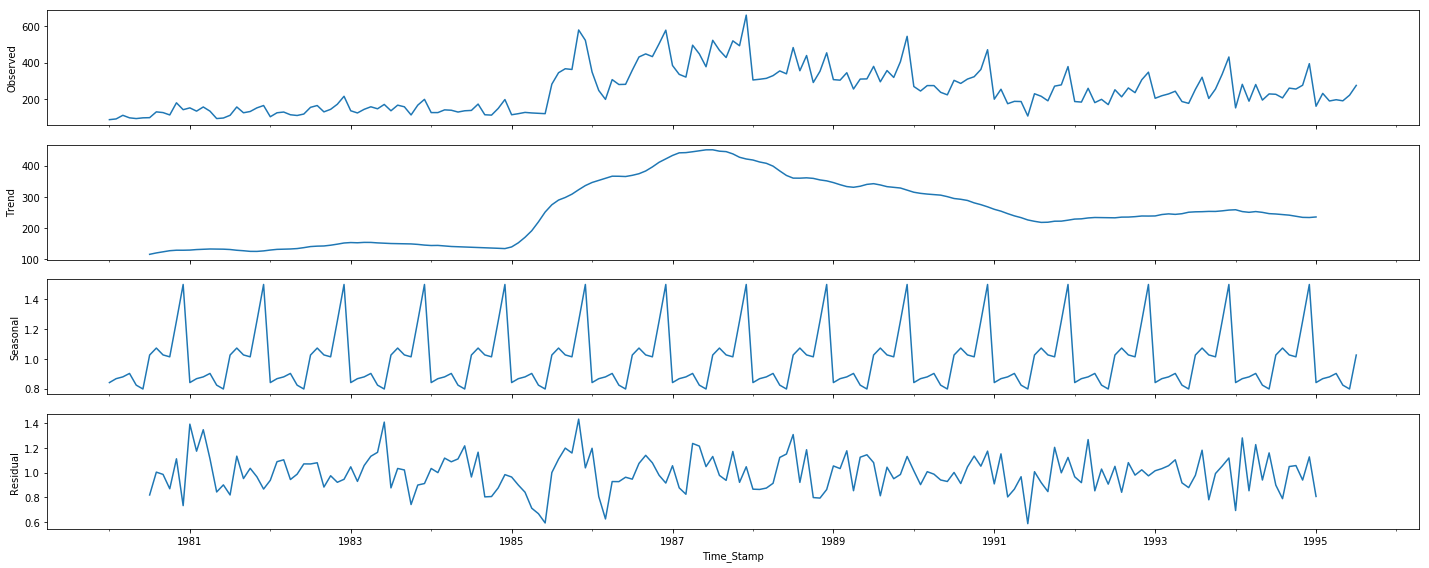

In [64]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [65]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
             Shoe_Sales
Time_Stamp            
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31  114.458333
1980-08-31  118.958333
1980-09-30  122.666667
1980-10-31  126.125000
1980-11-30  127.666667
1980-12-31  127.625000 

Seasonality 
             Shoe_Sales
Time_Stamp            
1980-01-31    0.840405
1980-02-29    0.866682
1980-03-31    0.878675
1980-04-30    0.901826
1980-05-31    0.823141
1980-06-30    0.797254
1980-07-31    1.025527
1980-08-31    1.072445
1980-09-30    1.026307
1980-10-31    1.013557
1980-11-30    1.254223
1980-12-31    1.499958 

Residual 
             Shoe_Sales
Time_Stamp            
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.817856
1980-08-31    1.003322
1980-09-30    0.984958
1980-10-31    0.868308
1980-11-30    1.111649
1980-12-31    0.7313

### Check for stationarity of the whole Time Series data.

#### Check for stationarity of the whole Time Series data.

#### The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

#### The hypothesis in a simple form for the ADF test is:

#### H0 : The Time Series has a unit root and is thus non-stationary.
#### H1 : The Time Series does not have a unit root and is thus stationary.

#### We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.¶

In [66]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

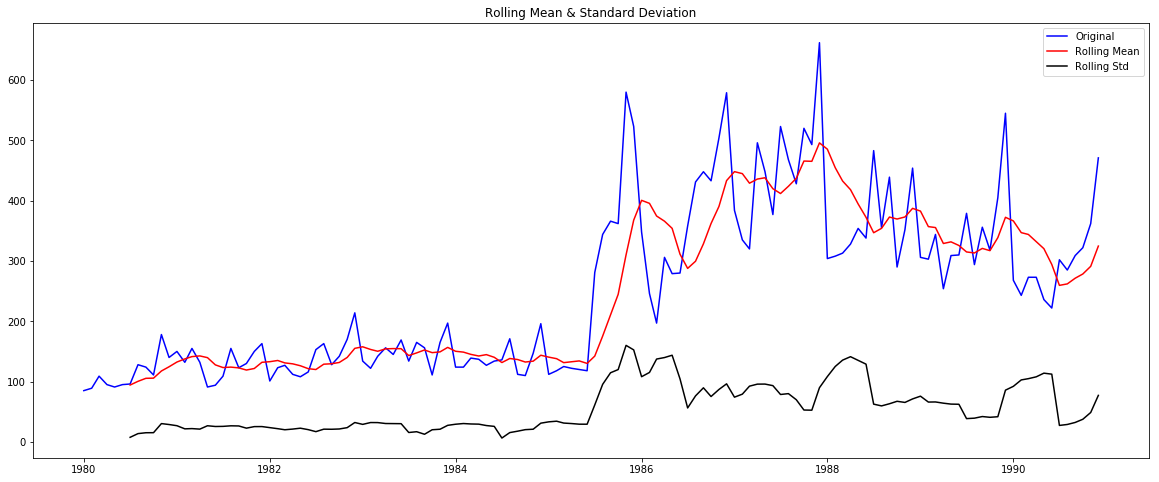

Results of Dickey-Fuller Test:
Test Statistic                  -1.361129
p-value                          0.600763
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [67]:
test_stationarity(train['Shoe_Sales'])

#### Seriers is not stationery with original form at alpha = 0.05.The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

In [68]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


## Build an ARIMA model

In [69]:
# Creating an empty Dataframe with column names only
dfObj = pd.DataFrame(columns=['param', 'AIC'])
dfObj

,param,AIC


In [70]:
# Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train['Shoe_Sales'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj = dfObj.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\sign

ARIMA(0, 0, 0) - AIC:1679.7318616601665
ARIMA(0, 0, 1) - AIC:1594.7155312334096
ARIMA(0, 0, 2) - AIC:1561.672964677353
ARIMA(1, 0, 0) - AIC:1515.578020280621
ARIMA(1, 0, 1) - AIC:1510.151410681249


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2) - AIC:1509.8642291666513
ARIMA(2, 0, 0) - AIC:1512.543153417407


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1) - AIC:1507.969957860078


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2) - AIC:1509.9171122983928


In [71]:
dfObj.sort_values(by=['AIC'])

,param,AIC
7,"(2, 0, 1)",1507.969958
5,"(1, 0, 2)",1509.864229
8,"(2, 0, 2)",1509.917112
4,"(1, 0, 1)",1510.151411
6,"(2, 0, 0)",1512.543153
3,"(1, 0, 0)",1515.578020
2,"(0, 0, 2)",1561.672965
1,"(0, 0, 1)",1594.715531
0,"(0, 0, 0)",1679.731862


In [72]:
## ARIMA(1,0,2) has the lowest AIC
mod = ARIMA(train['Shoe_Sales'], order=(1,0,2))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                     ARMA(1, 2)   Log Likelihood                -749.932
Method:                       css-mle   S.D. of innovations             70.552
Date:                Sun, 20 Feb 2022   AIC                           1509.864
Time:                        20:36:42   BIC                           1524.278
Sample:                    01-01-1980   HQIC                          1515.721
                         - 12-01-1990                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              248.1122     73.516      3.375      0.001     104.024     392.200
ar.L1.Shoe_Sales     0.9669      0.031     31.401      0.000       0.907       1.027
ma.L1.Shoe_Sales    -0.3494 

In [73]:
final_hat_avg =test.copy()
pred_ARIMA = results_Arima.forecast(steps=len(test))
pred_ARIMA[0]

array([404.88891712, 374.86415523, 370.66893628, 366.61257016,
       362.69046114, 358.8981656 , 355.23138698, 351.68597093,
       348.25790063, 344.94329217, 341.7383902 , 338.63956368,
       335.64330173, 332.74620968, 329.94500522, 327.23651468,
       324.61766942, 322.08550237, 319.63714467, 317.26982241,
       314.98085349, 312.76764457, 310.62768816, 308.55855976,
       306.55791512, 304.62348756, 302.75308544, 300.94458966,
       299.19595125, 297.50518905, 295.87038748, 294.28969438,
       292.76131886, 291.28352931, 289.85465147, 288.47306644,
       287.13720894, 285.84556549, 284.59667269, 283.38911558,
       282.22152605, 281.09258126, 280.00100213, 278.94555196,
       277.92503494, 276.93829487, 275.9842138 , 275.06171078,
       274.16974066, 273.30729284, 272.47339022, 271.66708801,
       270.88747268, 270.13366096, 269.40479881])

In [74]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test.Shoe_Sales,pred_ARIMA[0]))
print(rmse)

106.7866240776026


In [75]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(1, 0, 2)'])

resultsDf

,Test RMSE
"ARIMA(1, 0, 2)",106.786624


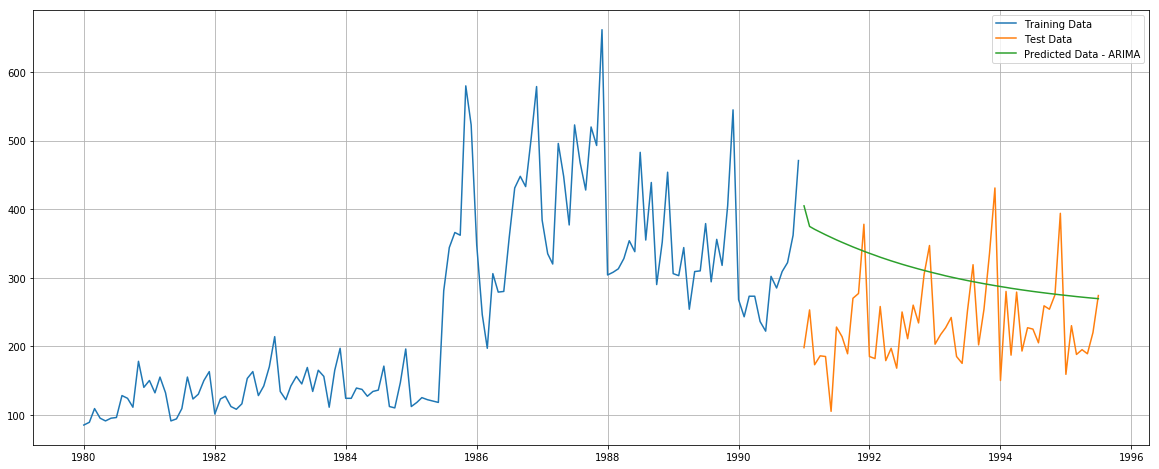

In [76]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

### Build an SARIMA model.

In [77]:
### As the dataset has seasonality.. Let's build the model with SARIMA
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [78]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train ['Shoe_Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, Va

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:1856.6762692705802
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:1698.8646025849823
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:1582.8960614978612
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:1564.7367401155961
SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:1526.3718294831865


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:1470.3783934638225
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:1482.4893443002602
SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:1481.4453160722182


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:1471.7911163503218
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:1711.881318951797


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:1591.3221174983885
SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:1505.2981691950874


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:1518.7229372211712


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:1471.3890154994165


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:1419.2174509700153
SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:1445.4240151085964


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:1440.7307277393195


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:1420.1506326860622
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:1632.020706394031


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:1515.0197179170739


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:1455.3024386629932


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:1505.2934770468107


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:1451.797436987665


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:1399.1402925304076
SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:1440.8782022375565


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:1445.6632947044777


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:1398.4593751900568
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:1509.0791612561102
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:1455.1916620923917
SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:1400.4688970976458
SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:1456.1831699378718


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:1455.8980827873602


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:1402.4433254024884
SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:1400.9811864721223


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:1402.2150543249159


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:1399.0583059739624
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:1488.5369501986715
SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:1438.2647093854869

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:1384.327633117838
SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:1448.7503226626814


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:1440.1727777751616


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:1386.3222635873672
SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:1394.4252827258936


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:1396.378714513092


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:1380.6052589832639
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:1476.1111290265728
SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:1425.8242209039463


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:1374.3119479703955
SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:1446.948433817408


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:1427.7896945923221


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:1376.2593890551495


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:1395.3637952148201


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:1397.2555132913972


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:1374.0055015879952
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:1492.6809473249873


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:1452.2357458354315


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:1396.3199504342213


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:1441.980032246224


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:1442.9509478662094


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:1398.2737554207652


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:1384.7967389116936


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:1386.7073417877732


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:1379.5522449520213
SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:1484.9033977911968
SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:1433.77046548636


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:1381.3144775984133


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:1434.0851508562098


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:1435.0855978133075
SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:1383.2254179386268


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:1381.4489407279827


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:1383.0798676299962


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:1384.9803569732703
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:1476.6019094578453


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:1425.34218261012
SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:1372.8894340037077


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:1436.1639944550934


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:1426.8202539862798


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:1374.807158332482
SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:1383.4115684116323


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:1385.056263201713


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:1376.3939876127893


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [79]:
dfObj2.sort_values(by=['AIC'])

,param,seasonal,AIC
74,"(2, 0, 2)","(0, 0, 2, 5)",1372.889434
53,"(1, 0, 2)","(2, 0, 2, 5)",1374.005502
47,"(1, 0, 2)","(0, 0, 2, 5)",1374.311948
77,"(2, 0, 2)","(1, 0, 2, 5)",1374.807158
50,"(1, 0, 2)","(1, 0, 2, 5)",1376.259389
80,"(2, 0, 2)","(2, 0, 2, 5)",1376.393988
62,"(2, 0, 0)","(2, 0, 2, 5)",1379.552245
44,"(1, 0, 1)","(2, 0, 2, 5)",1380.605259
65,"(2, 0, 1)","(0, 0, 2, 5)",1381.314478
69,"(2, 0, 1)","(2, 0, 0, 5)",1381.448941


In [80]:
## SARIMA(1,0,2)(0,0,2,5) - AIC:6914.849775
mod = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                order=(1,0,2),
                                seasonal_order=(0,0,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:                        Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood                -681.156
Date:                           Sun, 20 Feb 2022   AIC                           1374.312
Time:                                   20:37:20   BIC                           1390.987
Sample:                               01-01-1980   HQIC                          1381.083
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0009      0.010    103.024      0.000       0.982       1.020
ma.L1         -0.3722      0.087     -4.288

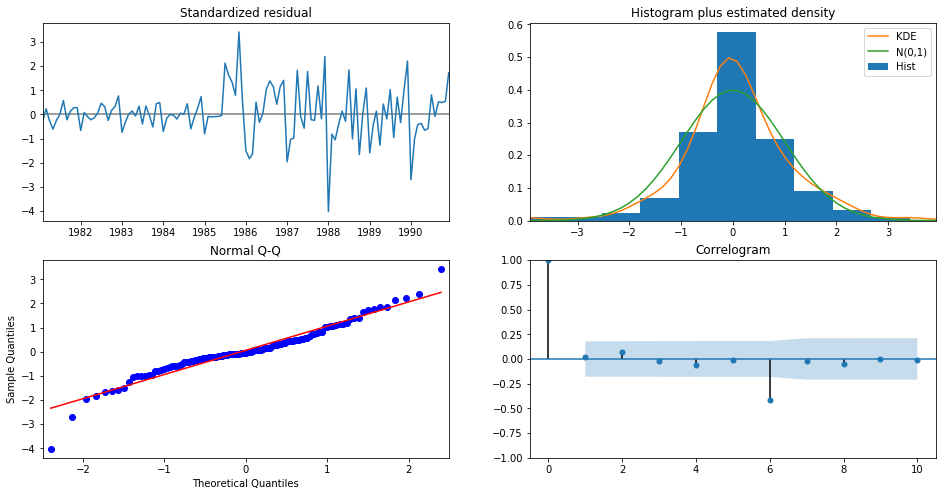

In [81]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [82]:
final_hat_avg =test.copy()
pred_SARIMA = results.get_forecast(steps=len(test))
pred_SARIMA.predicted_mean

1991-01-01    413.555956
1991-02-01    389.986686
1991-03-01    392.831815
1991-04-01    394.753675
1991-05-01    389.282127
1991-06-01    390.837270
1991-07-01    388.887259
1991-08-01    387.503447
1991-09-01    386.395148
1991-10-01    378.868325
1991-11-01    383.297136
1991-12-01    385.424929
1992-01-01    385.761340
1992-02-01    386.098046
1992-03-01    386.435045
1992-04-01    386.772339
1992-05-01    387.109927
1992-06-01    387.447810
1992-07-01    387.785987
1992-08-01    388.124460
1992-09-01    388.463228
1992-10-01    388.802292
1992-11-01    389.141652
1992-12-01    389.481308
1993-01-01    389.821260
1993-02-01    390.161509
1993-03-01    390.502055
1993-04-01    390.842899
1993-05-01    391.184040
1993-06-01    391.525478
1993-07-01    391.867215
1993-08-01    392.209250
1993-09-01    392.551583
1993-10-01    392.894216
1993-11-01    393.237147
1993-12-01    393.580378
1994-01-01    393.923908
1994-02-01    394.267738
1994-03-01    394.611868
1994-04-01    394.956299


In [83]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test.Shoe_Sales,pred_SARIMA.predicted_mean))
print(rmse)

170.3258385754008


In [84]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(1, 0, 2)(0, 0, 2)5'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"ARIMA(1, 0, 2)",106.786624
"SARIMA(1, 0, 2)(0, 0, 2)5",170.325839


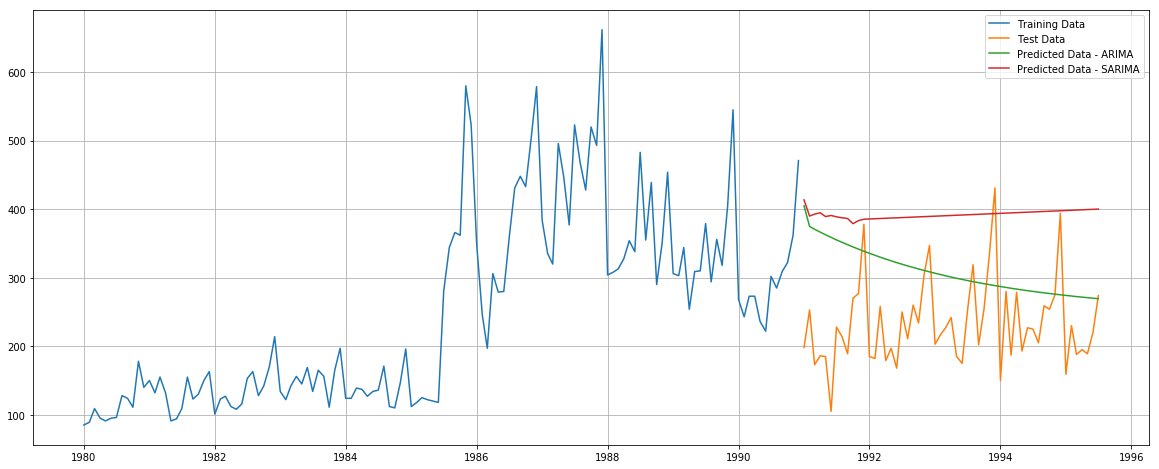

In [85]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

#### RMSE OF SARIMA has reduced in comparison to ARIMA when seasonality was introduced

### ACF & PACF

In [86]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

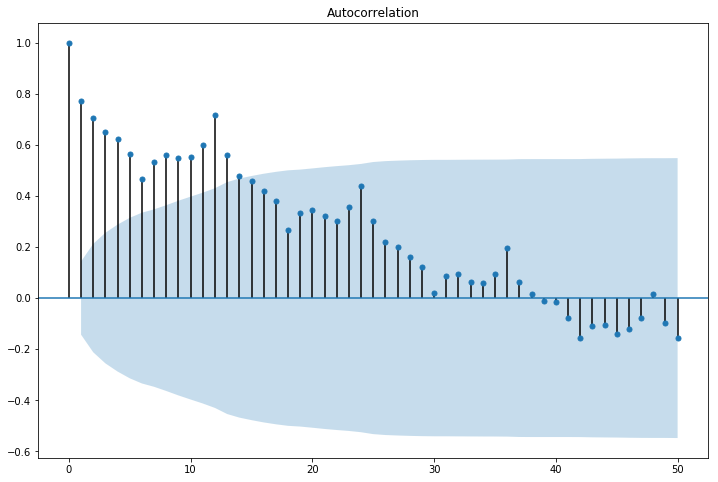

In [87]:
plt.figure(figsize=(12,8))
plot_acf(df,lags=50,  ax=plt.gca())
plt.show()

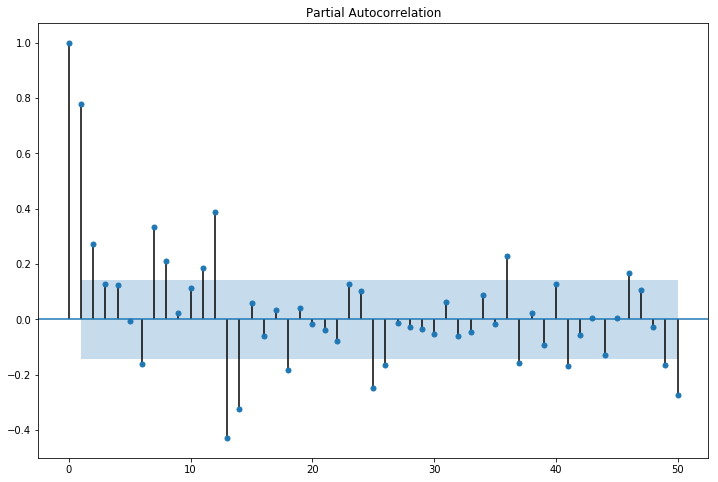

In [88]:
plt.figure(figsize=(12,8))
plot_pacf(df, lags=50, ax=plt.gca())
plt.show()

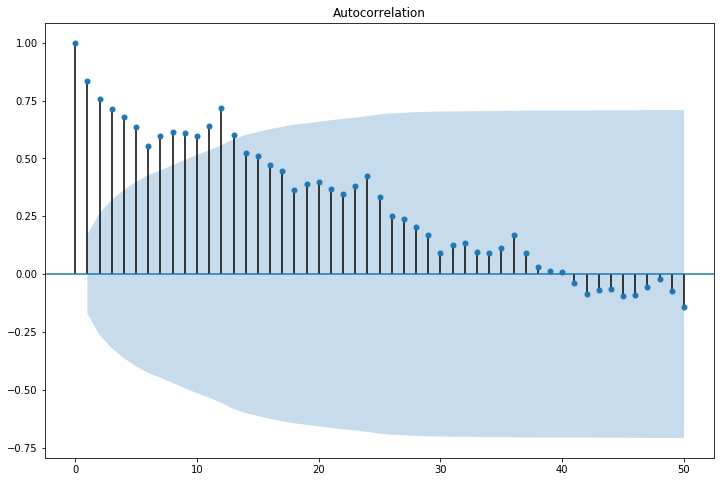

In [89]:
plt.figure(figsize=(12,8))
plot_acf(train,lags=50,  ax=plt.gca())
plt.show()

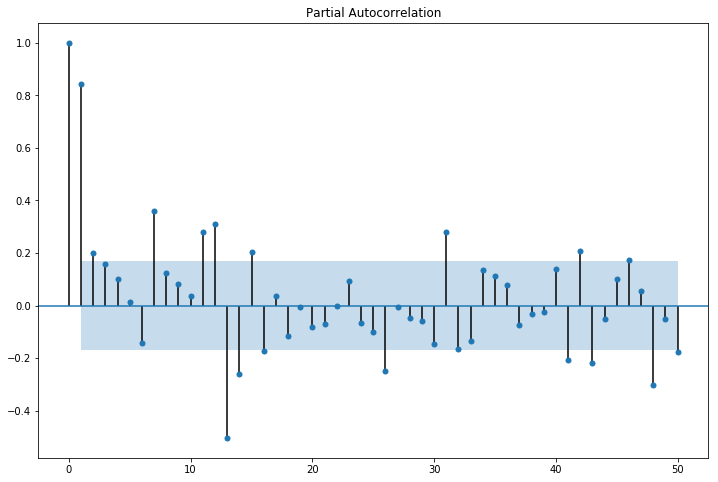

In [90]:
plt.figure(figsize=(12,8))
plot_pacf(train, lags=50, ax=plt.gca())
plt.show()

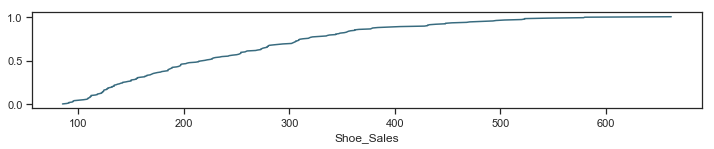

In [91]:
## Plot ECDF: Empirical Cumulative Distribution Function
#ECDF - Adds up the number of observations that are there for a certain value.
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df['Shoe_Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Shoe_Sales');